In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
# modify the path below accordingly
PATH = "/content/drive/MyDrive/compvision/gesture_face_features"

In [14]:
# !pip install mediapipe

In [74]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [84]:
# importing .py files from /code
import sys
import os

from utils import *
from config import Config, available_models
from heatmap import Heatmap
from hand_extraction import extract_hand_mp

In [85]:
sys.path.append(os.path.join(PATH, "code"))

In [17]:
available_models

['VGG19',
 'ResNet50',
 'InceptionV3',
 'EfficientNetB0',
 'EfficientNetB1',
 'EfficientNetB6',
 'squeezenet']

In [19]:
# Configurations
img_type="sign"
letter = "A"
is_random = False
load_data = True
model_name = available_models[1]

In [48]:
print(f"Configuring {model_name} for {img_type} images for letter {letter}")
conf = Config(PATH,
                img_type=img_type,
                letter=letter,
                model_name=model_name,
                load_data=load_data,
                is_random=is_random
              )

Configuring ResNet50 for sign images for letter A
Loading data...
Data loaded successfully.
Setting up model ResNet50...
Model was set up successfully.


1/1 [==============================] - 0s 183ms/step


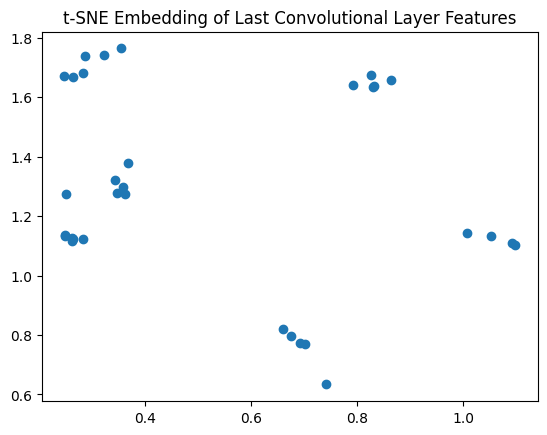

In [87]:
last_conv_outputs = conf.get_last_conv_outputs(conf.img_type)
tsne_embedding = get_tsne(last_conv_outputs)